# Discrete Anomaly Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import seaborn as sns
%matplotlib inline

import main

from acquire import get_log_data
from prepare import prep_log_data, ip_statistics, ip_status_proabilities, eda_log_data

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = get_log_data()
df = prep_log_data(df)

In [3]:
df.head()

,ip,request_method,status,size,destination,request_agent,agent_name,size_mb,download_size,ip_count,ip_probability,request_call,api_version,endpoints,http
timestamp,,,,,,,,,,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0,python,0.488753,Low,11999,0.85842,GET,/api/v1,/sales,HTTP/1.1
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0,python,0.003396,Low,11999,0.85842,GET,/api/v1,/items,HTTP/1.1
2019-04-16 19:34:44,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0,python,0.486472,Low,11999,0.85842,GET,/api/v1,/sales,HTTP/1.1
2019-04-16 19:34:46,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0,python,0.486377,Low,11999,0.85842,GET,/api/v1,/sales,HTTP/1.1
2019-04-16 19:34:48,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0,python,0.488246,Low,11999,0.85842,GET,/api/v1,/sales,HTTP/1.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13978 entries, 2019-04-16 19:34:42 to 2019-04-21 10:02:41
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ip              13978 non-null  object  
 1   request_method  13978 non-null  object  
 2   status          13978 non-null  int64   
 3   size            13978 non-null  int64   
 4   destination     25 non-null     object  
 5   request_agent   13978 non-null  object  
 6   agent_name      13978 non-null  object  
 7   size_mb         13978 non-null  float64 
 8   download_size   13978 non-null  category
 9   ip_count        13978 non-null  int64   
 10  ip_probability  13978 non-null  float64 
 11  request_call    13744 non-null  object  
 12  api_version     13744 non-null  object  
 13  endpoints       13744 non-null  object  
 14  http            13744 non-null  object  
dtypes: category(1), float64(2), int64(3), object(9)
memory usage: 1.6+ MB

In [5]:
ip_statistics(df)

,ip,ip_count,ip_probability
0,97.105.19.58,11999,0.858420
1,173.173.113.51,1059,0.075762
2,72.181.113.170,613,0.043855
3,72.181.105.81,246,0.017599
4,68.201.219.223,21,0.001502
5,24.26.242.9,21,0.001502
6,52.87.230.102,2,0.000143
7,35.175.171.137,2,0.000143
8,70.121.214.34,2,0.000143
9,34.207.64.242,1,0.000072


## 1. Use basic probability to identify anomalous request methods. You will want to make sure the text is normalized in order to reduce the noise.

In [6]:
train = df.loc['2019-04-16 19:34:42':'2019-04-17 12:55:14'] \
              [['ip','request_method','status', 'size',
                'destination','agent_name', 'endpoints', 'size_mb']]

In [7]:
train = train.fillna(0)

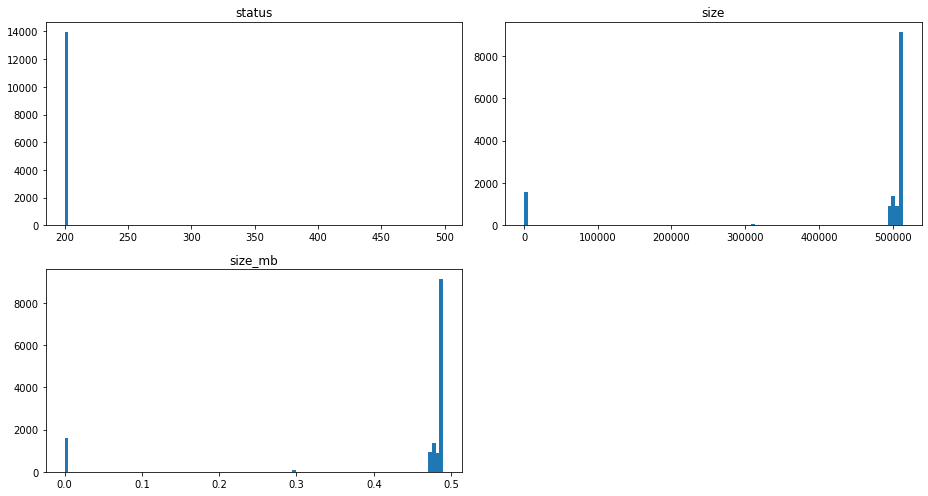

In [8]:
train.hist(figsize=(13, 7),
           grid=False,
           bins=100)
plt.tight_layout();

In [9]:
ip_statistics(train)

,ip,ip_count,ip_probability
0,97.105.19.58,11998,0.858595
1,173.173.113.51,1059,0.075784
2,72.181.113.170,613,0.043867
3,72.181.105.81,246,0.017604
4,68.201.219.223,21,0.001503
5,24.26.242.9,21,0.001503
6,52.87.230.102,2,0.000143
7,35.175.171.137,2,0.000143
8,70.121.214.34,2,0.000143
9,34.207.64.242,1,0.000072


In [10]:
df = eda_log_data(train, df)

In [11]:
df.head()

,ip,request_method,status,size,destination,request_agent,agent_name,size_mb,download_size,ip_count,ip_probability,request_call,api_version,endpoints,http,ip_status_count,prob_status_given_ip
timestamp,,,,,,,,,,,,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0,python,0.488753,Low,11999,0.85842,GET,/api/v1,/sales,HTTP/1.1,11984.0,0.998833
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0,python,0.003396,Low,11999,0.85842,GET,/api/v1,/items,HTTP/1.1,11984.0,0.998833
2019-04-16 19:34:44,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0,python,0.486472,Low,11999,0.85842,GET,/api/v1,/sales,HTTP/1.1,11984.0,0.998833
2019-04-16 19:34:46,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0,python,0.486377,Low,11999,0.85842,GET,/api/v1,/sales,HTTP/1.1,11984.0,0.998833
2019-04-16 19:34:48,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0,python,0.488246,Low,11999,0.85842,GET,/api/v1,/sales,HTTP/1.1,11984.0,0.998833


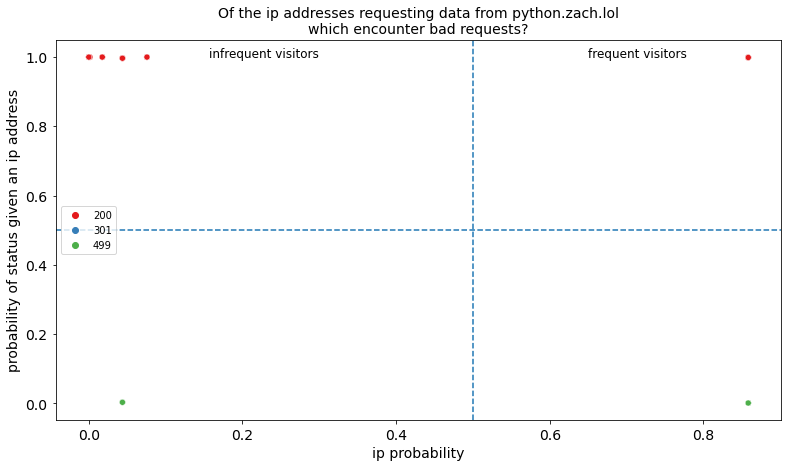

In [46]:
plt.figure(figsize=(13, 7))
sns.scatterplot(df.ip_probability,
                df.prob_status_given_ip,
                hue=df.status,
                palette='Set1')

plt.title('Of the ip addresses requesting data from python.zach.lol\nwhich encounter bad requests?', fontsize=14)
plt.tick_params(labelsize=14, pad=5)
plt.xlabel('ip probability', fontsize=14)
plt.ylabel('probability of status given an ip address', fontsize=14)
plt.axhline(y=.5, linestyle='--')
plt.axvline(x=.5, linestyle='--')
plt.legend(loc='center left')
plt.text(0.3, 1.01, 'infrequent visitors', horizontalalignment='right', verticalalignment='center', fontsize=12)
plt.text(0.65, 1.01, 'frequent visitors', horizontalalignment='left', verticalalignment='center', fontsize=12);

In [13]:
train.head()

,ip,request_method,status,size,destination,agent_name,endpoints,size_mb
timestamp,,,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,0,python,/sales,0.488753
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,0,python,/items,0.003396
2019-04-16 19:34:44,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,0,python,/sales,0.486472
2019-04-16 19:34:46,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,0,python,/sales,0.486377
2019-04-16 19:34:48,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,0,python,/sales,0.488246


In [14]:
df['download_size'] = pd.cut(df.size_mb, 3, labels=['Low', 'Average', 'High'])

In [15]:
df.head()

,ip,request_method,status,size,destination,request_agent,agent_name,size_mb,download_size,ip_count,ip_probability,request_call,api_version,endpoints,http,ip_status_count,prob_status_given_ip
timestamp,,,,,,,,,,,,,,,,,
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,512495,NaN,python-requests/2.21.0,python,0.488753,Low,11999,0.85842,GET,/api/v1,/sales,HTTP/1.1,11984.0,0.998833
2019-04-16 19:34:42,97.105.19.58,GET /api/v1/items HTTP/1.1,200,3561,NaN,python-requests/2.21.0,python,0.003396,Low,11999,0.85842,GET,/api/v1,/items,HTTP/1.1,11984.0,0.998833
2019-04-16 19:34:44,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510103,NaN,python-requests/2.21.0,python,0.486472,Low,11999,0.85842,GET,/api/v1,/sales,HTTP/1.1,11984.0,0.998833
2019-04-16 19:34:46,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,510003,NaN,python-requests/2.21.0,python,0.486377,Low,11999,0.85842,GET,/api/v1,/sales,HTTP/1.1,11984.0,0.998833
2019-04-16 19:34:48,97.105.19.58,GET /api/v1/sales HTTP/1.1,200,511963,NaN,python-requests/2.21.0,python,0.488246,Low,11999,0.85842,GET,/api/v1,/sales,HTTP/1.1,11984.0,0.998833


In [16]:
df.ip.value_counts()

97.105.19.58      11999
173.173.113.51     1059
72.181.113.170      613
72.181.105.81       246
68.201.219.223       21
24.26.242.9          21
52.87.230.102         2
35.175.171.137        2
70.121.214.34         2
34.207.64.242         1
97.105.15.120         1
54.172.14.223         1
35.174.209.2          1
52.91.30.150          1
3.88.129.158          1
52.90.165.200         1
95.31.18.119          1
34.229.70.250         1
95.31.16.121          1
54.145.52.184         1
3.92.201.136          1
45.23.250.16          1
Name: ip, dtype: int64

In [28]:
df.endpoints.value_counts(dropna=False)

/sales                       12403
/items                        1065
NaN                            234
/stores                        229
//api/v1/items                  11
/items/api/v1/items              7
/items/next_page                 5
/                                4
/sales/                          3
/itemsitems                      3
/store                           3
/sales/                          3
items                            2
                                 1
/items&page=0                    1
/items/                          1
/I_DIDNT_DO_IT!!!!               1
//api/v1/items/next_page         1
/helloclass!                     1
Name: endpoints, dtype: int64

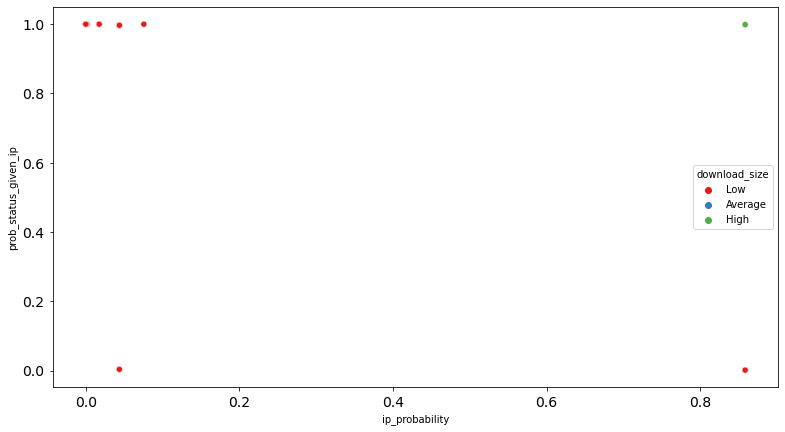

In [47]:
plt.figure(figsize=(13, 7))
sns.scatterplot(df.ip_probability,
                df.prob_status_given_ip,
                hue=df.download_size,
                palette='Set1')
plt.tick_params(labelsize=14, pad=5);

In [19]:
df.groupby(by=['status', 'download_size']).size()

status  download_size
200     Low              13958
        Average              1
        High                 1
301     Low                  2
        Average              0
        High                 0
499     Low                 16
        Average              0
        High                 0
dtype: int64

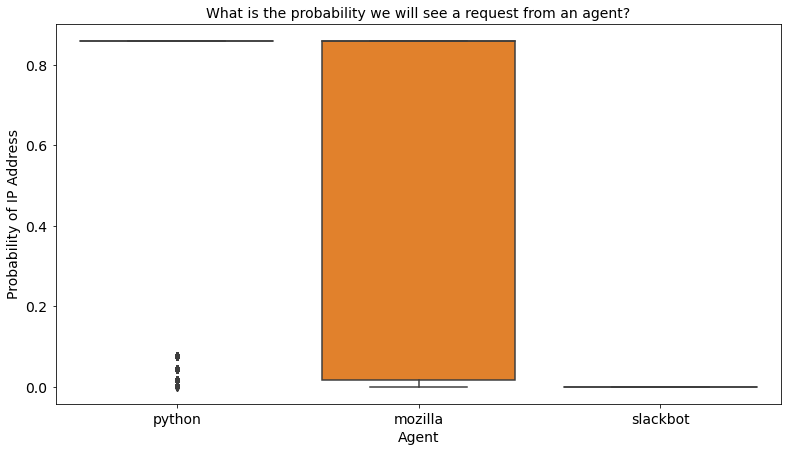

In [48]:
plt.figure(figsize=(13, 7))
sns.boxplot(df.agent_name, df.ip_probability)
plt.title('What is the probability we will see a request from an agent?', fontsize=14)
plt.tick_params(labelsize=14, pad=5)
plt.xlabel('Agent', fontsize=14)
plt.ylabel('Probability of IP Address', fontsize=14);

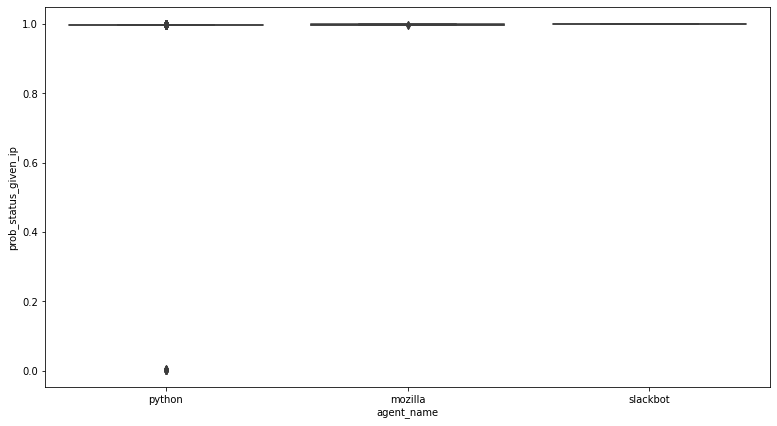

In [21]:
plt.figure(figsize=(13, 7))
sns.boxplot(df.agent_name, df.prob_status_given_ip);

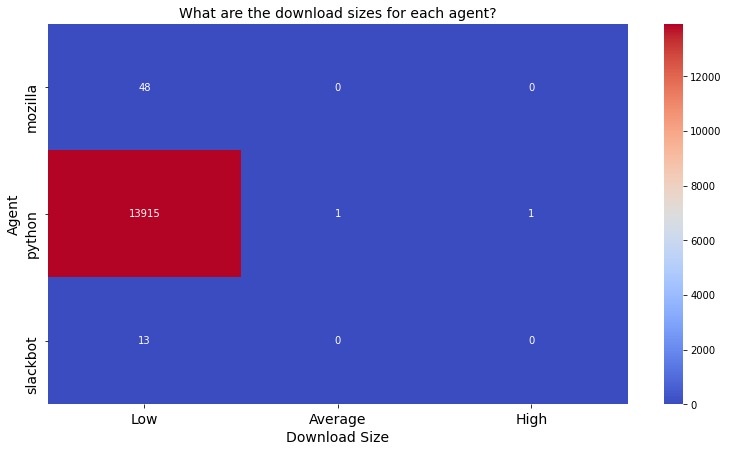

In [49]:
plt.figure(figsize=(13, 7))
sns.heatmap(pd.crosstab(df.agent_name, df.download_size),
            cmap='coolwarm',
            annot=True,
            fmt='.0f')
plt.title('What are the download sizes for each agent?', fontsize=14)
plt.tick_params(labelsize=14, pad=5)
plt.xlabel('Download Size', fontsize=14)
plt.ylabel('Agent', fontsize=14);

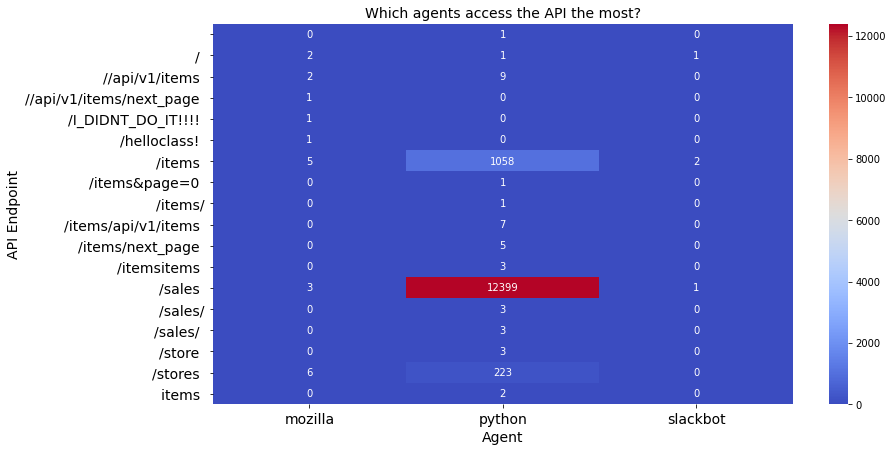

In [50]:
plt.figure(figsize=(13, 7))
sns.heatmap(pd.crosstab(df.endpoints, df.agent_name),
            cmap='coolwarm',
            annot=True,
            fmt='.0f')

plt.title('Which agents access the API the most?', fontsize=14)
plt.tick_params(labelsize=14, pad=5)
plt.xlabel('Agent', fontsize=14)
plt.ylabel('API Endpoint', fontsize=14);

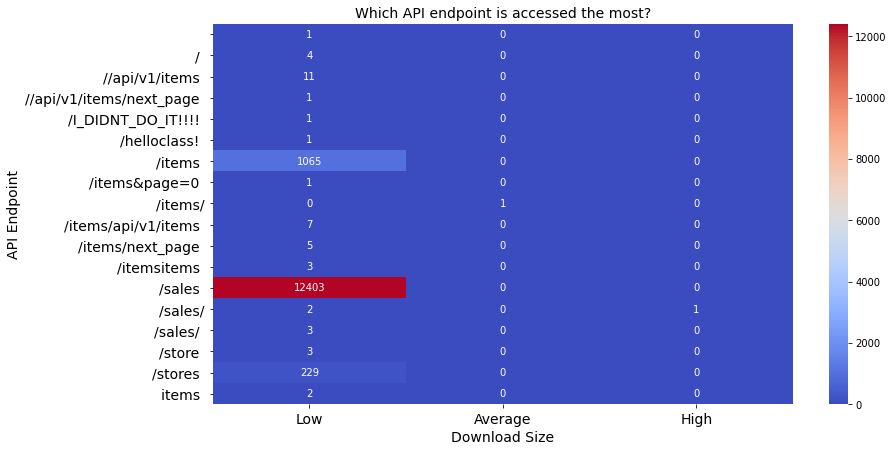

In [51]:
plt.figure(figsize=(13, 7))
sns.heatmap(pd.crosstab(df.endpoints, df.download_size),
            cmap='coolwarm',
            annot=True,
            fmt='.0f')

plt.title('Which API endpoint is accessed the most?', fontsize=14)
plt.tick_params(labelsize=14, pad=5)
plt.xlabel('Download Size', fontsize=14)
plt.ylabel('API Endpoint', fontsize=14);

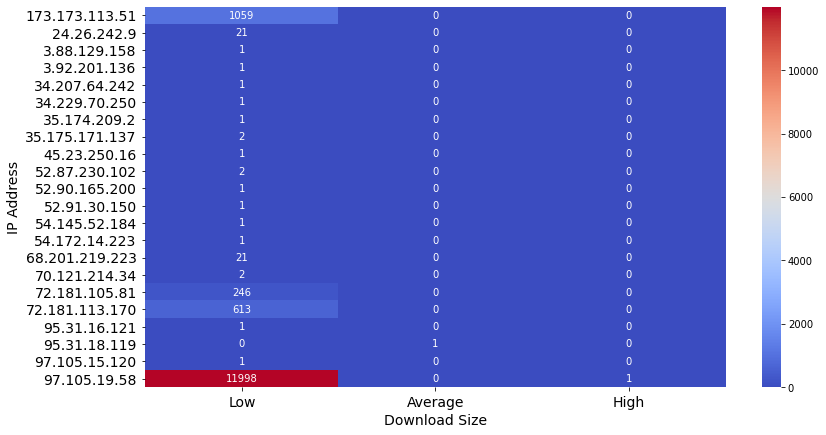

In [52]:
plt.figure(figsize=(13, 7))
sns.heatmap(pd.crosstab(df.ip, df.download_size),
            cmap='coolwarm',
            annot=True,
            fmt='.0f')
plt.tick_params(labelsize=14, pad=5)
plt.xlabel('Download Size', fontsize=14)
plt.ylabel('IP Address', fontsize=14);